# Pytket Extensions



Pytket Extensionは様々な企業が開発している量子回路プログラミング言語、量子デバイス、量子シミュレーターと連携することを可能にする拡張機能です。
Azure QuantumとAmazon Braketといった、クラウド経由で追加の量子デバイスやシミュレータにアクセスすることも可能です。

pytketのBackendは、量子回路を処理するためのQPU（Quantum Processing Unit）または量子シミュレータへの接続を表します。
pytketで利用可能なBackendの種類は、以下の通りです。
- QPUs: ショットベースの結果を返す量子コンピュータです。例：QuantinuumBackend.

- クラウドバックエンド: pytketがクラウドプラットフォームと連携し、追加のQPUやシミュレータにアクセスできるようにするバックエンドです。例：AzureBackend.

- エミュレータ: これらは古典コンピュータで量子回路をシミュレートし、ショットベースの結果を生成します。エミュレータはノイズ・モデルを使用し、実際のQPUをエミュレートするための接続性制約を持つ場合もあります。例：IBMQEmulatorBackend.

- ステートベクターシミュレータ: 回路によって準備された純粋な量子状態を計算し、ベクトル/ndarrayを返します。例：ForestStateBackend, AerStateBackend.

- ユニタリーシミュレータ: ユニタリーシミュレータは、回路によって適用されるユニタリーオペレータを計算します。ユニタリー行列/ndarrayが返されます。例：AerUnitaryBackend.

- 密度行列シミュレータ: これらのシミュレータは、回路によって準備される密度行列を計算します。例：CirqDensityMatrixSampleBackend 。

- その他の特殊なシミュレータ: 特定のタイプの回路をシミュレートするための拡張機能があります。例：SimplexBackendはClifford回路をシミュレートするために設計されています。


ここでは
- 量子回路の変換
- 量子回路を量子デバイスや量子シミュレータで実行

### TKETとは (再掲)
- Quantum Software Development Kit
- C++で実装
- pythonモジュール　`pytket`で利用可能
- 最適化コンパイラ：　ユーザーフレンドリーな回路→量子デバイスで実行可能な回路に変換可能
    - Language-agnostic (多くの量子プログラミングフレームワーク(qiskit, Cirq, etc)をサポート)
    - Retagetable (多くの量子デバイス(IBM Quantum, Quantinuum, AWS Braket, etc)をサポート)
    - Circuit Optimisation (量子計算時に生じるデバイスエラーの影響を最小化。デバイス依存＆デバイス非依存のものが実装)

<img src="fig/tket1.png" width="750">

#### 参照
- [pytket ドキュメント](https://cqcl.github.io/tket/pytket/api/index.html)
- [pytket ユーザーマニュアル](https://cqcl.github.io/pytket/manual/index.html)
- [t|ket⟩ : A Retargetable Compiler for NISQ Devices](https://arxiv.org/abs/2003.10611)

#### 今回必要となる python パッケージ
Python 3.9.17で動作確認をしています。

|  パッケージ （version） |  概要  |
| :---- | :---- |
|  pytket  |  tketを利用するためのpython モジュール  ( available for python3.9 or higher )|
|  pytket-qiskit  |  qiskitを利用するためのpytket-extension  |

<img src="fig/tket2.png" width="750">

環境にインストールされていない場合は、以下のセルの＃を取り除き、インストールしてください。

In [1]:
#!pip install -U pytket
#!pip install -U pytket-qiskit
#!pip install -U pytket-qsharp

## 1. 量子回路の変換
pytketでは
- qiskitで記述した量子回路(`qiskit.QuantumCircuit`)からtketの量子回路のクラスに変換が可能
- tketで記述した量子回路からqiskitの量子回路(`qiskit.QuantumCircuit`)のクラスに変換が可能
- tketで記述した量子回路と他の量子プログラミング言語での量子回路の交換が可能

参照：[pytket-extensions](https://cqcl.github.io/pytket-extensions/api/index.html) 

### 1-1. `qiskit`の量子回路から`tket`の量子回路に変換

In [2]:
from qiskit import QuantumCircuit

qs_bell = QuantumCircuit(2)
qs_bell.h(0)
qs_bell.cx(0,1)
qs_bell.measure_all()

qs_bell.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [3]:
from pytket.extensions.qiskit import qiskit_to_tk

In [4]:
bell2 = qiskit_to_tk(qs_bell)
bell2

[H q[0]; CX q[0], q[1]; Barrier q[0], q[1]; Measure q[0] --> meas[0]; Measure q[1] --> meas[1]; ]

In [5]:
from pytket.circuit.display import render_circuit_jupyter
render_circuit_jupyter(bell2)

### 1-2. `tket`の量子回路から`qiskit`の量子回路に変換

In [6]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

bell = Circuit(2)
bell.H(0).CX(0,1)
bell.measure_all()

render_circuit_jupyter(bell)

In [7]:
from pytket.extensions.qiskit import tk_to_qiskit

In [8]:
qs_bell2 = tk_to_qiskit(bell)
qs_bell2

In [9]:
qs_bell2.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

## 2. 量子回路を量子デバイスや量子シミュレータで実行

#### 下記のスクリプトのAzure Quantumの箇所では<span style="color: red; ">有料の操作</span>となりますので、ご注意ください。

#### 2-1. pytket-qiskitを利用して、IBM Quantumのシミュレータや実機にジョブを実行

#### a. IBM Quantum へのアクセス設定

In [10]:
ibm_token = "your ibm token"

In [11]:
from qiskit_ibm_provider import IBMProvider
IBMProvider.save_account(token=ibm_token, overwrite=True)

In [12]:
from pytket.extensions.qiskit.backends.config import set_ibmq_config
set_ibmq_config(ibmq_api_token=ibm_token)

In [13]:
from pytket.extensions.qiskit import IBMQBackend

In [14]:
device = IBMQBackend.available_devices()

In [15]:
[dev.device_name for dev in device]

['simulator_stabilizer',
 'ibm_nairobi',
 'ibm_brisbane',
 'ibmq_qasm_simulator',
 'simulator_mps',
 'simulator_statevector',
 'ibm_lagos',
 'ibm_perth',
 'simulator_extended_stabilizer']

※注意 IBMから以下の発表があった  
１０月２８日周辺：以下のデバイスは引退を予定  
ibm_perth, ibm_lagos, ibm_nairobi

#### b. backendの選択

In [24]:
from pytket.extensions.qiskit import IBMQBackend, IBMQEmulatorBackend, AerBackend

In [25]:
# ibm_backend = AerBackend()
# ibm_backend = IBMQBackend("ibm_brisbane")
# ibm_backend = IBMQBackend("ibmq_qasm_simulator")
# AerBackend to emulate the behaviour of IBMQBackend. Requires a valid IBMQ account.
ibm_backend = IBMQEmulatorBackend("ibm_nairobi")

#### c. backendのゲートセットに書き換える
`Backend.get_compiled_circuit(Circuit)`

In [26]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter

In [27]:
bell = Circuit(2)
bell.H(0).CX(0,1)
bell.measure_all()
render_circuit_jupyter(bell)

ibm_bell = ibm_backend.get_compiled_circuit(bell)
render_circuit_jupyter(ibm_bell)

#### d. 選択したbackendに量子回路を送信して実行させる

In [28]:
ibm_handle = ibm_backend.process_circuit(ibm_bell, n_shots =1000)

In [29]:
ibm_result = ibm_backend.get_result(ibm_handle)

In [30]:
#ibm_backend.cancel(ibm_handle)

#### e. 結果の表示

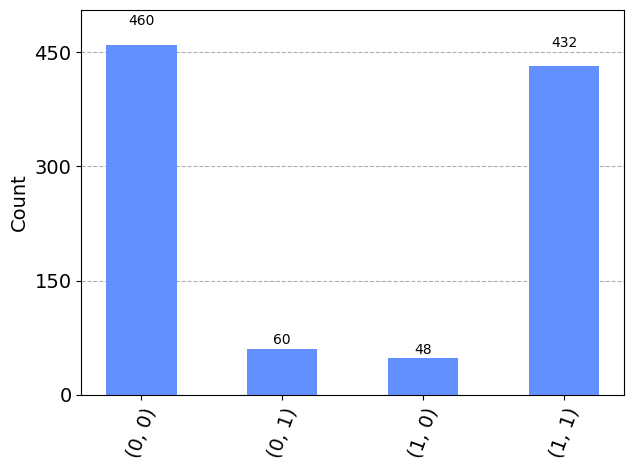

In [31]:
from qiskit.visualization import plot_histogram
plot_histogram(ibm_result.get_counts())